Longest day have = 16.732599523096972 hours and occur at (Day 173).
Shortest day have = 7.201786110785734 hours and occur at (Day 355).


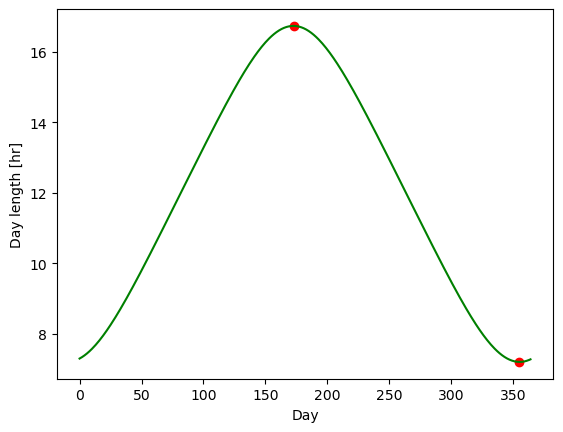

In [1]:
import scipy.constants as const
import numpy as np
from astropy.coordinates import SkyCoord, EarthLocation
import math
import matplotlib.pyplot as plt
import astropy.units as u


obs = EarthLocation(lat=53*u.deg+28*u.arcmin+49*u.arcsec,
                    lon=10*u.deg+14*u.arcmin+23*u.arcsec)
phi = obs.lat
N = np.arange(365)
omega = 2*math.pi/365.24
ecl = math.radians(23.44)
delta = -np.arcsin(math.sin(ecl) * np.cos(omega * (N+10)))
h = np.arccos(-np.tan(delta) * math.tan(phi.radian))
T = (np.degrees(2*h)/360) * u.sday.to(u.h)

j = np.argmax(T)
x_max = N[j]
y_max = T[j]
plt.plot(x_max, y_max, color='red', marker='o')

i = np.argmin(T)
x_min = N[i]
y_min = T[i]
plt.plot(x_min, y_min, color='red', marker='o')

print(f"Longest day have = {y_max} hours and occur at (Day {x_max}).")
print(f"Shortest day have = {y_min} hours and occur at (Day {x_min}).")

plt.plot(N, T, color='green')
plt.xlabel("Day")
plt.ylabel("Day length [hr]")
plt.savefig("day_length.pdf")

Hamburg: 53.48 deg
Longyearbyen: 78.22 deg
New York: 40.72 deg
Bangkok: 13.75 deg


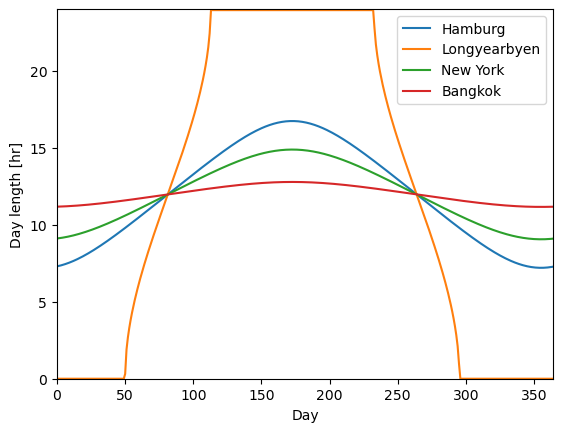

In [2]:
phi = { 'Hamburg' : obs.lat.radian,
        'Longyearbyen' : math.radians(78+13/60),
        'New York' : math.radians(40+43/60),
        'Bangkok' : math.radians(13+45/60),
      }

for city in phi:
    print(city + ": {:.2f} deg".format(math.degrees(phi[city])))
    h = np.arccos(np.clip(-np.tan(delta)*math.tan(phi[city]), -1.0,  1.0))
    T = (np.degrees(2*h)/360) * u.sday.to(u.h)
    plt.plot(N, T, label=city)
    
plt.xlabel("Day")
plt.xlim(0,364)
plt.ylabel("Day length [hr]")
plt.ylim(0,24)
plt.legend(loc='upper right')
plt.savefig("daylength.pdf")